In [37]:
# Imports
import numpy as mp
import pandas as pd
import plotly.express as px

# Inline Plots
%matplotlib inline

In [44]:
# Data Read-In
annual_mean_temp = pd.read_csv('./data/global_annual_mean_temp.csv')

In [45]:
# Data Details
annual_mean_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          143 non-null    int64  
 1   No_Smoothing  143 non-null    float64
 2   Lowess(5)     143 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [46]:
# Data Prep
annual_mean_temp = annual_mean_temp.drop(columns=['Lowess(5)'])
annual_mean_temp.columns = ['Year', 'Temperature']
annual_mean_temp.head()

,Year,Temperature
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28


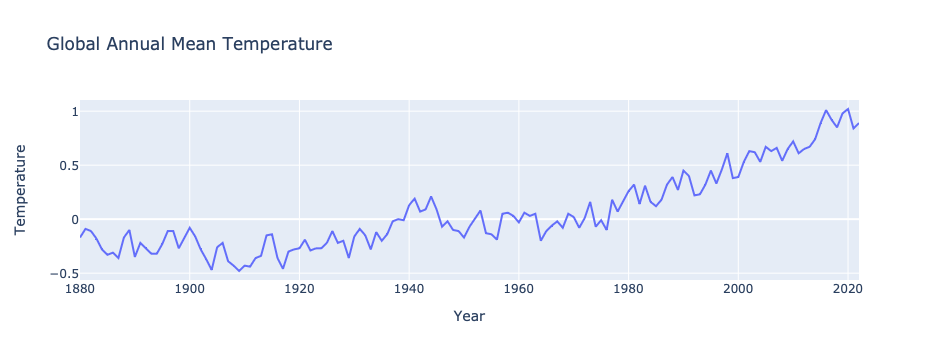

In [47]:
# Data Visualization
plot = px.line(annual_mean_temp, x='Year', y='Temperature', title='Global Annual Mean Temperature')
plot.show()

In [ ]:
# Model Setup

In [ ]:
# Model Training

In [ ]:
# Model Predictions

In [ ]:
# Model Testing